In [32]:
import os
import settings
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc.xls"), encoding="ISO-8859-1")
    return df


In [3]:
df = read_data()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2444 entries, 0 to 2627
Columns: 146 entries, index to negemo_decr
dtypes: float64(118), int64(15), object(13)
memory usage: 2.7+ MB


In [11]:
def calculate_sentiment_change():
    df['posemo_incr'] = df['posemo2'] - df['posemo1']
    df['negemo_decr'] = df['negemo1'] - df['negemo2']
    df['affect_change'] = df['posemo_incr'] - df['negemo_decr']
    return df

In [12]:
df = calculate_sentiment_change()

In [13]:
df.head()

,index,comments,description,duration,event,film_date,languages,main_speaker,name,published_date,...,sad1,affect2,posemo2,negemo2,anx2,anger2,sad2,posemo_incr,negemo_decr,affect_change
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1151367060,...,0.13,3.28,2.50,0.58,0.13,0.13,0.06,-0.32,0.89,-1.21
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1151367060,...,0.55,3.06,1.67,1.39,0.28,0.28,0.56,-1.90,-0.29,-1.61
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1151367060,...,0.31,4.26,2.90,1.36,0.12,0.31,0.56,0.02,-0.07,0.09
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1151367060,...,0.45,5.11,3.24,1.62,0.19,0.32,0.32,0.65,0.52,0.13
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1151440680,...,0.00,3.54,2.53,1.01,0.13,0.19,0.06,1.14,-0.25,1.39


In [14]:
df['posemo_incr'].describe()

count    2444.000000
mean        0.461624
std         1.141986
min        -7.790000
25%        -0.190000
50%         0.415000
75%         1.100000
max         6.670000
Name: posemo_incr, dtype: float64

In [15]:
df['negemo_decr'].describe()

count    2444.000000
mean        0.058224
std         0.928500
min       -14.290000
25%        -0.400000
50%         0.010000
75%         0.520000
max         4.790000
Name: negemo_decr, dtype: float64

In [16]:
df['affect_change'].describe()

count    2444.000000
mean        0.403400
std         1.441252
min       -10.430000
25%        -0.422500
50%         0.335000
75%         1.202500
max        16.080000
Name: affect_change, dtype: float64

In [21]:
def create_published_year():
    df['published_date_dt'] = pd.to_datetime(df['published_date'])
    df['published_dt'] = pd.to_datetime(df['published_date'],unit='s')
    df['published_year'] = df['published_dt'].dt.year
    return df

def create_moral_category_from_subsets():
    df['Harm'] = df['HarmVirtue'] + df['HarmVice']
    df['Fairness'] = df['FairnessVirtue'] + df['FairnessVice']
    df['Purity'] = df['PurityVirtue'] + df['PurityVice']
    df['Ingroup'] = df['IngroupVirtue'] + df['IngroupVice']
    df['Authority'] = df['AuthorityVirtue'] + df['AuthorityVice']
    return df

df = create_published_year()
df = create_moral_category_from_subsets()

In [22]:

df.head()

,index,comments,description,duration,event,film_date,languages,main_speaker,name,published_date,...,negemo_decr,affect_change,published_date_dt,published_dt,published_year,Harm,Fairness,Purity,Ingroup,Authority
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1151367060,...,0.89,-1.21,1970-01-01 00:00:01.151367060,2006-06-27 00:11:00,2006,0.00,0.00,0.03,0.03,0.41
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1151367060,...,-0.29,-1.61,1970-01-01 00:00:01.151367060,2006-06-27 00:11:00,2006,0.00,0.00,0.00,0.55,0.41
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1151367060,...,-0.07,0.09,1970-01-01 00:00:01.151367060,2006-06-27 00:11:00,2006,0.03,0.00,0.09,0.12,0.03
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1151367060,...,0.52,0.13,1970-01-01 00:00:01.151367060,2006-06-27 00:11:00,2006,0.29,0.22,0.06,0.96,0.13
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1151440680,...,-0.25,1.39,1970-01-01 00:00:01.151440680,2006-06-27 20:38:00,2006,0.00,0.16,0.03,1.04,0.00


In [33]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

def plot_moral_words_by_year():
    df.groupby('published_year')['MoralityGeneral'].mean().plot()
    df.groupby('published_year')['Harm'].mean().plot()
    df.groupby('published_year')['Authority'].mean().plot()
    df.groupby('published_year')['Fairness'].mean().plot()
    df.groupby('published_year')['Ingroup'].mean().plot()
    df.groupby('published_year')['Purity'].mean().plot()
    # Show correlation matrix of moral category by year
    
    # Show p-value of correlation of moral category by year
    

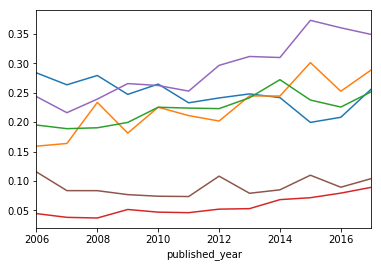

In [34]:
plot_moral_words_by_year()

In [35]:
df[['MoralityGeneral', 'Harm', 'Authority', 'Ingroup', 'Purity', 'Fairness', 'published_date']].corr()

,MoralityGeneral,Harm,Authority,Ingroup,Purity,Fairness,published_date
MoralityGeneral,1.000000,0.065378,0.068348,-0.037941,0.016400,0.123824,-0.052308
Harm,0.065378,1.000000,0.166907,0.216890,0.143721,0.096939,0.105854
Authority,0.068348,0.166907,1.000000,0.217058,-0.011165,0.148562,0.069671
Ingroup,-0.037941,0.216890,0.217058,1.000000,0.038544,0.126757,0.148848
Purity,0.016400,0.143721,-0.011165,0.038544,1.000000,-0.000744,0.034588
Fairness,0.123824,0.096939,0.148562,0.126757,-0.000744,1.000000,0.125746
published_date,-0.052308,0.105854,0.069671,0.148848,0.034588,0.125746,1.000000


In [37]:
moral_df = df[['MoralityGeneral', 'Harm', 'Authority', 'Ingroup', 'Purity', 'Fairness', 'published_date']]
calculate_pvalues(moral_df)

,MoralityGeneral,Harm,Authority,Ingroup,Purity,Fairness,published_date
MoralityGeneral,0,0.0012,0.0007,0.0607,0.4177,0,0.0097
Harm,0.0012,0,0,0,0,0,0
Authority,0.0007,0,0,0,0.5812,0,0.0006
Ingroup,0.0607,0,0,0,0.0568,0,0
Purity,0.4177,0,0.5812,0.0568,0,0.9707,0.0874
Fairness,0,0,0,0,0.9707,0,0
published_date,0.0097,0,0.0006,0,0.0874,0,0
